# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [9]:
import turicreate as tc

In [10]:
sf_amazon = tc.SFrame.read_csv("./Reviews.csv")

sf_amazon['words_dict'] = tc.text_analytics.count_words(sf_amazon['Text'])
sf_amazon['words_dict_no_stop'] = sf_amazon['words_dict'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
sf_amazon['words_2grams'] = tc.text_analytics.count_ngrams(sf_amazon['Text'], n=2, method='word')
sf_amazon['words_3grams'] = tc.text_analytics.count_ngrams(sf_amazon['Text'], n=3, method='word')

features_list = ['words_dict_no_stop','words_2grams','words_3grams','HelpfulnessNumerator','HelpfulnessDenominator']

sf_amazon.materialize()
train, test = sf_amazon.random_split(0.8)



Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

3 lines failed to parse correctly

Finished parsing file /data/home/laadan/BigData/Lecture 6/Reviews.csv

Parsing completed. Parsed 100 lines in 0.226268 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 189510

Unable to interpret "nce glasses each day for 6 weeks I did not notice a significant reduction in pain or stiffness. If the star rating were for this aspect I would award 2.5-3 stars.<br /><br />The Knudsen company does not make any health claims regarding this product so as far as a beverage I would give it 4 stars. I agree with the reviews that state this does have a somewhat prune-like flavor to it. One person stated it tastes like 70% cherry and 30% prune and I would agree with that statement.<br /><br />Conclusion: I was pleased to see this juice had helped so many reviewers with their arthritis and gout; as a juice product only I think the cherry flavor is good but may not be for everyone because of the strong note of prune flavor."
195029" as a integer
Parse failed at token ending at: 
	veryone because of the strong note of prune flavor."
195029,^B001HTG8IQ,A2MFXL6D1EJTVH,Kolef88,1,2,3,12703392
Successfully parsed 0 tokens:

Unable to interpret "encouraged him to eat" as a integer
Parse failed at token ending at: 
	encouraged him to eat,^ again.  It is also low in fat which is what he 
Successfully parsed 0 tokens:

Unable to interpret "aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product." as a integer
Parse failed at token ending at: 
	aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product.^
Successfully parsed 0 tokens:

Unexpected characters after last column. "B000GW6786"
Parse failed at token ending at: 
	yself that tastes much better than this."
415822,B000GW6786,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 415821
	1: B000GW6786
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
415822

8 lines failed to parse correctly

Finished parsing file /data/home/laadan/BigData/Lecture 6/Reviews.csv

Parsing completed. Parsed 289205 lines in 1.44968 secs.

In [11]:
cls = tc.regression.create(train, features=features_list, target="Score")

cls.evaluate(test)

Automatically generating validation set by sampling about 10000 out of 231019 datapoints.

Linear regression:

--------------------------------------------------------

Number of examples          : 100034

Number of features          : 5

Number of unpacked features : 4449758

Number of coefficients    : 4449759

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 5        | 0.040077  | 89.810262    | 54.438102          | 24.679285            | 3.184189                        | 3.239102                          |

| 1         | 9        | 0.841627  | 157.567019   | 132.898782         | 29.945461            | 2.769383                        | 2.993659                          |

| 2         | 11       | 1.000000  | 162.192499   | 32.440690          | 31.389395            | 2.467183                        | 2.885572                          |

| 3         | 12       | 1.000000  | 168.264752   | 32.523688          | 33.224676            | 2.156623                        | 2.763488                          |

| 4         | 13       | 1.000000  | 172.061339   | 143.042790         | 35.120778            | 1.883543                        | 2.647488                          |

| 6         | 15       | 1.000000  | 180.472791   | 35.440533          | 35.703852            | 1.504224                        | 2.549672                          |

| 7         | 16       | 1.000000  | 185.156636   | 26.524445          | 35.438833            | 1.299820                        | 2.498211                          |

| 8         | 17       | 1.000000  | 190.073990   | 79.299900          | 35.511904            | 1.178808                        | 2.455219                          |

| 9         | 22       | 0.827920  | 203.277163   | 30.555309          | 35.553540            | 1.057074                        | 2.444266                          |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

{'max_error': 30.185014602169446, 'rmse': 2.4090332002996746}

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [14]:
import turicreate as tc
from afinn import Afinn
import spacy
from tqdm import tqdm_notebook as tqdm
import en_core_web_lg
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [17]:
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"
afinn = Afinn()

sf_amazon = tc.SFrame.read_csv("./Reviews.csv")
sf_amazon['Sentiment'] = sf_amazon['Score'].apply(lambda label: label2sentiment(label))
sf_amazon['afinn_score'] = sf_amazon['Text'].apply(lambda t: afinn.score(t))
sf_amazon['blob'] = sf_amazon['Text'].apply(lambda t: TextBlob(t).sentiment.polarity)
sf_amazon.materialize()

train, test = sf_amazon.random_split(0.8)
cls1 = tc.classifier.create(train, features=['afinn_score'], target="Sentiment")
res1 = cls1.evaluate(test)
cls2 = tc.classifier.create(train, features=['blob'], target="Sentiment")
res2 = cls2.evaluate(test)


Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

3 lines failed to parse correctly

Finished parsing file /data/home/laadan/BigData/Lecture 6/Reviews.csv

Parsing completed. Parsed 100 lines in 0.22393 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 190786

Unable to interpret "nce glasses each day for 6 weeks I did not notice a significant reduction in pain or stiffness. If the star rating were for this aspect I would award 2.5-3 stars.<br /><br />The Knudsen company does not make any health claims regarding this product so as far as a beverage I would give it 4 stars. I agree with the reviews that state this does have a somewhat prune-like flavor to it. One person stated it tastes like 70% cherry and 30% prune and I would agree with that statement.<br /><br />Conclusion: I was pleased to see this juice had helped so many reviewers with their arthritis and gout; as a juice product only I think the cherry flavor is good but may not be for everyone because of the strong note of prune flavor."
195029" as a integer
Parse failed at token ending at: 
	veryone because of the strong note of prune flavor."
195029,^B001HTG8IQ,A2MFXL6D1EJTVH,Kolef88,1,2,3,12703392
Successfully parsed 0 tokens:

Unable to interpret "encouraged him to eat" as a integer
Parse failed at token ending at: 
	encouraged him to eat,^ again.  It is also low in fat which is what he 
Successfully parsed 0 tokens:

Unable to interpret "aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product." as a integer
Parse failed at token ending at: 
	aDent just for grins and really like it! The taste is pleasant and long lasting. Nice flavor still after chewing away. Would recommend it to those who aren't sure if it's a product they would like. Great gum product.^
Successfully parsed 0 tokens:

Unexpected characters after last column. "B000GW6786"
Parse failed at token ending at: 
	yself that tastes much better than this."
415822,B000GW6786,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 415821
	1: B000GW6786
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
415822

8 lines failed to parse correctly

Finished parsing file /data/home/laadan/BigData/Lecture 6/Reviews.csv

Parsing completed. Parsed 289205 lines in 1.33482 secs.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 219971

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.190215     | 0.802256          | 0.804604            | 0.588374          | 0.587844            |

| 2         | 0.361396     | 0.802256          | 0.804604            | 0.533752          | 0.532924            |

| 3         | 0.541023     | 0.802256          | 0.804604            | 0.503376          | 0.502365            |

| 4         | 0.722598     | 0.802256          | 0.804604            | 0.486180          | 0.485062            |

| 5         | 0.904106     | 0.802256          | 0.804604            | 0.476471          | 0.475304            |

| 10        | 1.765349     | 0.802256          | 0.804604            | 0.465173          | 0.463944            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 219971

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.187005     | 0.802256          | 0.804604            | 0.472707          | 0.471348            |

| 2         | 0.365931     | 0.802256          | 0.804604            | 0.472683          | 0.471347            |

| 3         | 0.550098     | 0.802256          | 0.804604            | 0.472638          | 0.471241            |

| 4         | 0.720774     | 0.802256          | 0.804604            | 0.472618          | 0.471221            |

| 5         | 0.901959     | 0.802256          | 0.804604            | 0.472606          | 0.471209            |

| 10        | 1.820619     | 0.802256          | 0.804604            | 0.472591          | 0.471184            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 219971

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.188906     | 0.802256          | 0.804604            | 0.472638          | 0.471268            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 219971

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.094557     | 0.781067          | 0.782544            |

| 1         | 6        | 2.500000  | 0.219157     | 0.787754          | 0.788909            |

| 2         | 7        | 2.500000  | 0.294384     | 0.219852          | 0.218676            |

| 3         | 11       | 0.576025  | 0.450498     | 0.785804          | 0.786817            |

| 4         | 12       | 0.720032  | 0.522506     | 0.779848          | 0.780975            |

| 9         | 29       | 0.811958  | 1.204695     | 0.779462          | 0.780452            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 219971

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.080987     | 0.781067          | 0.782544            |

| 2         | 3        | 0.156446     | 0.787754          | 0.788909            |

| 3         | 4        | 0.229028     | 0.790609          | 0.790304            |

| 4         | 5        | 0.303474     | 0.790609          | 0.790304            |

| 5         | 6        | 0.390135     | 0.790609          | 0.790304            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8046037143604499
PROGRESS: RandomForestClassifier          : 0.8046037143604499
PROGRESS: DecisionTreeClassifier          : 0.8046037143604499
PROGRESS: SVMClassifier                   : 0.7804516522800593
PROGRESS: LogisticClassifier              : 0.7903042985439009
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 219910

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.198346     | 0.807139          | 0.810147            | 0.579420          | 0.578715            |

| 2         | 0.374701     | 0.807230          | 0.810494            | 0.519247          | 0.517956            |

| 3         | 0.550470     | 0.807485          | 0.811101            | 0.484586          | 0.482985            |

| 4         | 0.735228     | 0.807580          | 0.811188            | 0.463994          | 0.462160            |

| 5         | 0.914400     | 0.807398          | 0.810841            | 0.451639          | 0.449660            |

| 10        | 1.796726     | 0.808017          | 0.811188            | 0.434230          | 0.432533            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 219910

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.212723     | 0.807176          | 0.809887            | 0.450912          | 0.448482            |

| 2         | 0.399322     | 0.807271          | 0.810061            | 0.450587          | 0.448392            |

| 3         | 0.585364     | 0.807258          | 0.810061            | 0.450539          | 0.448531            |

| 4         | 0.771199     | 0.807167          | 0.810494            | 0.450522          | 0.448501            |

| 5         | 0.966573     | 0.807285          | 0.809974            | 0.450471          | 0.448510            |

| 10        | 1.908447     | 0.807571          | 0.810668            | 0.450405          | 0.448366            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 219910

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.199117     | 0.807139          | 0.810147            | 0.450781          | 0.449034            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 219910

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.133503     | 0.787368          | 0.787771            |

| 1         | 6        | 2.500000  | 0.300985     | 0.798199          | 0.797832            |

| 2         | 11       | 0.155940  | 0.535285     | 0.801028          | 0.801648            |

| 3         | 12       | 0.194926  | 0.632604     | 0.800909          | 0.801648            |

| 4         | 15       | 0.974628  | 0.798239     | 0.798463          | 0.798786            |

| 9         | 26       | 0.564338  | 1.456861     | 0.779978          | 0.782394            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 219910

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.090066     | 0.796567          | 0.796878            |

| 2         | 3        | 0.178980     | 0.803983          | 0.805984            |

| 3         | 4        | 0.285064     | 0.805393          | 0.807459            |

| 4         | 5        | 0.374735     | 0.805398          | 0.807546            |

| 5         | 6        | 0.462502     | 0.805379          | 0.807546            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8111882046834346
PROGRESS: RandomForestClassifier          : 0.8106678230702515
PROGRESS: DecisionTreeClassifier          : 0.8101474414570685
PROGRESS: SVMClassifier                   : 0.7823937554206418
PROGRESS: LogisticClassifier              : 0.8075455333911535
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [28]:
print(res1)
print('\n'+ '--'*100 + '\n')
print(res2)

{'accuracy': 0.8046048645373496, 'auc': 0.7133942205370578, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Negative   |     Negative    |  3032 |
|   Positive   |     Negative    |  1692 |
|   Negative   |     Positive    |  9595 |
|   Positive   |     Positive    | 43446 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.8850365149370027, 'log_loss': 0.4632535247751632, 'precision': 0.8191022039554307, 'recall': 0.9625149541406354, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-------+-------+
| threshold | fpr | tpr |   p   |   n   |
+-----------+-----+-----+-------+-------+
|    0.0    | 1.0 | 1.0 | 45138 | 12627 |
|   1e-05   | 1.0 | 1.0 | 45138 | 12627 |
|   2e-05   | 1.0 | 1.0 | 45138 | 12627 |
|  

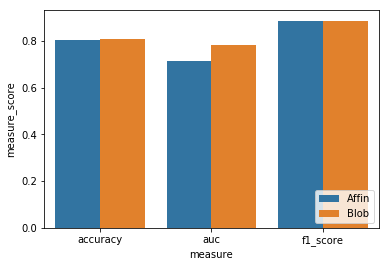

In [22]:
res = pd.DataFrame(columns=['class', 'measure', 'measure_score'])
for measure, score in res1.items():
    if measure in ['accuracy', 'auc', 'f1_score']:
        res = res.append({'class': 'Affin', 'measure': measure, 'measure_score': score}, ignore_index=True)
for measure, score in res2.items():
    if measure in ['accuracy', 'auc', 'f1_score']:
        res = res.append({'class': 'Blob', 'measure': measure, 'measure_score': score}, ignore_index=True)
sns.barplot(data=res, x='measure', y='measure_score', hue='class')
plt.legend(loc='lower right')

**Question 3:**  Select a reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [44]:
hotel_sf = tc.SFrame.read_csv("./hotel_review.csv")
hotel_sf = hotel_sf.rename({"Is_Response": 'sentiment'})
hotel_sf = hotel_sf[hotel_sf['sentiment'].apply(lambda s: s=='happy' or s=='not happy')]
hotel_sf.materialize()
hotel_sf

Finished parsing file /data/home/laadan/BigData/Lecture 6/hotel_review.csv

Parsing completed. Parsed 100 lines in 0.20395 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /data/home/laadan/BigData/Lecture 6/hotel_review.csv

Parsing completed. Parsed 38932 lines in 0.333221 secs.

User_ID,Description,Browser_Used,Device_Used,sentiment
id10326,The room was kind ofclean but had a VERY ...,Edge,Mobile,not happy
id10327,I stayed at the CrownPlaza April -- - April ...,Internet Explorer,Mobile,not happy
id10328,I booked this hotelthrough Hotwire at the ...,Mozilla,Tablet,not happy
id10329,Stayed here with husbandand sons on the way t ...,InternetExplorer,Desktop,happy
id10330,My girlfriends and Istayed here to celebrate ...,Edge,Tablet,not happy
id10331,We had - rooms. One wasvery nice and clearly ...,InternetExplorer,Desktop,happy
id10332,My husband and I havestayed in this hotel a ...,Firefox,Tablet,not happy
id10333,My wife & I stayed inthis glorious city a ...,Google Chrome,Mobile,happy
id10334,My boyfriend and I stayedat the Fairmont on a ...,Internet Explorer,Desktop,happy
id10335,"Wonderful staff, greatlocation, but it was ...",Chrome,Tablet,not happy


In [37]:
nlp = en_core_web_lg.load()
l = []
for i in tqdm(range(len(hotel_sf))):
    text = hotel_sf[i]["Description"]
    l.append(nlp(text).vector)
hotel_sf['embedding'] = l 
hotel_sf.head()

100%|██████████| 38932/38932 [16:07<00:00, 40.23it/s]


User_ID,Description,Browser_Used,Device_Used,sentiment,embedding
id10326,The room was kind ofclean but had a VERY ...,Edge,Mobile,not happy,[-8.49629492e-022.04913720e-01 ...
id10327,I stayed at the CrownPlaza April -- - April ...,Internet Explorer,Mobile,not happy,[ 2.52744257e-021.43834785e-01 ...
id10328,I booked this hotelthrough Hotwire at the ...,Mozilla,Tablet,not happy,[ 1.90870464e-022.43706644e-01 ...
id10329,Stayed here with husbandand sons on the way t ...,InternetExplorer,Desktop,happy,[ 5.90319820e-021.28543690e-01 ...
id10330,My girlfriends and Istayed here to celebrate ...,Edge,Tablet,not happy,[ 2.75926329e-021.89239785e-01 ...
id10331,We had - rooms. One wasvery nice and clearly ...,InternetExplorer,Desktop,happy,[ 1.10339439e-021.44361585e-01 ...
id10332,My husband and I havestayed in this hotel a ...,Firefox,Tablet,not happy,[ 5.72171584e-021.23365790e-01 ...
id10333,My wife & I stayed inthis glorious city a ...,Google Chrome,Mobile,happy,[ 2.27079615e-021.79693699e-01 ...
id10334,My boyfriend and I stayedat the Fairmont on a ...,Internet Explorer,Desktop,happy,[ 7.02920109e-021.25407308e-01 ...
id10335,"Wonderful staff, greatlocation, but it was ...",Chrome,Tablet,not happy,[-4.62593250e-022.38092840e-01 ...


In [38]:
train, test = hotel_sf.random_split(0.8)
cls1 = tc.classifier.create(train,features=['embedding'], target="sentiment")
cls1.evaluate(test)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 29555

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients      : 301

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.735498     | 0.871765          | 0.868926            |

| 2         | 3        | 2.729390     | 0.877855          | 0.867008            |

| 3         | 4        | 3.784442     | 0.879547          | 0.867008            |

| 4         | 5        | 4.738446     | 0.879885          | 0.872123            |

| 5         | 6        | 5.754488     | 0.880020          | 0.872762            |

| 6         | 7        | 6.764288     | 0.879986          | 0.872762            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

SVM:

--------------------------------------------------------

Number of examples          : 29555

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

Number of coefficients    : 301

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.051056  | 0.133916     | 0.682118          | 0.677110            |

| 1         | 9        | 1.072178  | 0.284110     | 0.684622          | 0.681586            |

| 2         | 10       | 1.072178  | 0.351148     | 0.320014          | 0.322251            |

Warning: Reached max step size.

| 3         | 19       | 25.000000 | 0.621311     | 0.686280          | 0.680307            |

| 4         | 20       | 25.000000 | 0.696856     | 0.714262          | 0.719949            |

| 9         | 38       | 1.543422  | 1.378413     | 0.838504          | 0.826087            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8727621483375959
PROGRESS: SVMClassifier                   : 0.8260869565217391
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


{'accuracy': 0.872776142326891,
 'auc': 0.9267089010541464,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |  not happy   |      happy      |  584  |
 |    happy     |    not happy    |  410  |
 |    happy     |      happy      |  4892 |
 |  not happy   |    not happy    |  1927 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.79496699669967,
 'log_loss': 0.3186978397260243,
 'precision': 0.8245614035087719,
 'recall': 0.7674233373158105,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+------+------+
 | threshold |        fpr         | tpr |  p   |  n   |
 +-----------+--------------------+-----+------+------+
 |    0.0    |        1.0         | 1.0 | 2511 | 5302 |
 | 

In [43]:
hotel_sf['words_2grams'] = tc.text_analytics.count_ngrams(h_sf['Description'], n=2, method='word')
hotel_sf['words_2grams'] = hotel_sf['words_2grams'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
hotel_sf['afinn_score'] = hotel_sf['Description'].apply(lambda t: afinn.score(t))
hotel_sf['blob'] = hotel_sf['Description'].apply(lambda t: TextBlob(t).sentiment.polarity)

train, test = hotel_sf.random_split(0.8)
feature_list = ['embedding','blob','afinn_score','words_2grams']

cls1 = tc.classifier.create(train,features=feature_list, target="sentiment")
cls1.evaluate(test)



PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 29542

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 688049

Number of coefficients      : 688050

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.065686  | 1.049831     | 0.707027          | 0.680104            |

| 1         | 9        | 1.379414  | 1.864426     | 0.906404          | 0.767880            |

| 2         | 10       | 1.379414  | 2.131191     | 0.969264          | 0.833550            |

| 3         | 11       | 1.379414  | 2.400776     | 0.988796          | 0.858257            |

| 4         | 12       | 1.379414  | 2.662130     | 0.995633          | 0.866060            |

| 9         | 18       | 1.379414  | 4.189993     | 0.999966          | 0.868010            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 29542

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 688049

Number of coefficients    : 688050

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.071685  | 0.933215     | 0.707027          | 0.680104            |

| 1         | 9        | 1.505385  | 1.659827     | 0.915138          | 0.786086            |

| 2         | 10       | 1.505385  | 1.892407     | 0.980739          | 0.838752            |

| 3         | 12       | 1.124660  | 2.309932     | 0.992553          | 0.858257            |

| 4         | 13       | 1.124660  | 2.580261     | 0.995532          | 0.862809            |

| 9         | 18       | 1.124660  | 3.843653     | 0.999797          | 0.870611            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.8680104031209362
PROGRESS: SVMClassifier                   : 0.8706111833550065
PROGRESS: ---------------------------------------------
PROGRESS: Selecting SVMClassifier based on validation set performance.


{'accuracy': 0.8652572592969944, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |    happy     |    not happy    |  607  |
 |  not happy   |      happy      |  451  |
 |  not happy   |    not happy    |  2088 |
 |    happy     |      happy      |  4706 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns], 'f1_score': 0.7978601452044325, 'precision': 0.7747680890538033, 'recall': 0.8223710122095313}